# LABORATORIO 6 
## PROCESAMIENTO DIGITAL DE SEÑALES

* Julián Mauricio Sánchez Ceballos
* cc: 1001132830
* Universidad de Antioquia.



In [1]:
%pip install numpy -q
%pip install matplotlib -q
%pip install scipy -q
%pip install pandas -q


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import warnings 
warnings.simplefilter("ignore")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



# 1 Introducción - Serie discreta de Fourier

Una señal discreta \( x[n] \) que se repite periódicamente cada \( N \) intervalos de tiempo, puede representarse en términos de la serie de Fourier tal y como se muestra en la ecuación (1):

$$
x[n] = \sum_{k=0}^{N-1} C_k \cdot e^{j \frac{2\pi k n}{N}} \tag{1}
$$

Los valores de \( C_k \) son conocidos como coeficientes de la serie de Fourier y pueden ser calculados a partir de la ecuación (2):

$$
C_k = \frac{1}{N} \sum_{n=0}^{N-1} x[n] \cdot e^{-j \frac{2\pi k n}{N}} \tag{2}
$$



## Generación de Señales

Dada la señal:

$$x(n) =
\begin{cases} 
3 \cdot (C + 1) & -\frac{N}{2} < n < 0 \\
0 & n = 0 \\
-3 \cdot (C + 1) & 0 < n < \frac{N}{2}
\end{cases}
\tag{3}
$$

Donde $ N = (20 + C \cdot 2) $ y $ C = 0 $ es el último dígito de su cédula.

Grafique la señal $ x(n) $ con su respectivo vector de tiempo $ n $ para una frecuencia de muestreo de 1Hz.

### Preguntas:
1. ¿Qué puede decir sobre la señal graficada?
2. ¿Es la señal par o impar? ¿Por qué?

**Nota:** Use la función `plt.stem(n, x)` para graficar la señal.


La señal con la que se va a trabajar es la siguiente:
$$x(n) =
\begin{cases} 
3 \cdot  & -\frac{N}{2} < n < 0 \\
0 & n = 0 \\
-3 \cdot  & 0 < n < \frac{N}{2}
\end{cases}
\tag{3}
$$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

C = 0
N = (20 + C * 2)
print(N)

20


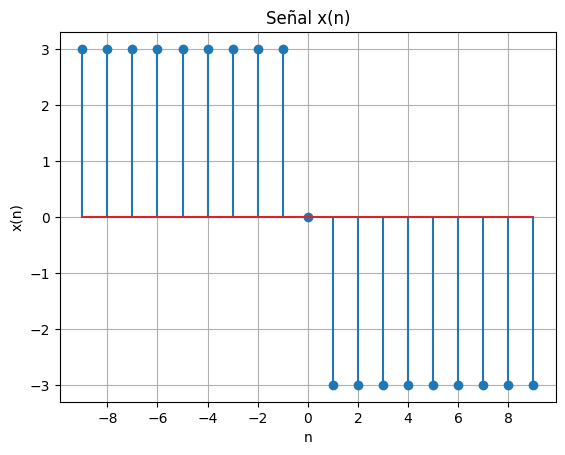

In [3]:
x1 = 3 * (C + 1) * np.ones(int(N/2)-1)
x2 = np.array([0])
x3 = -3 * (C + 1) * np.ones(int(N/2)-1)
n1 = np.arange((-N/2)+1, 0, 1)
n3 = np.arange(1, N/2, 1)
x = np.concatenate((x1, x2, x3))
n = np.concatenate((n1, np.array([0]), n3))


plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('Señal x(n)')
plt.grid()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

La señal es impar pues cumple con la definición de función impar:

$$ x[n] = -x[-n]$$


## Coeficientes de la serie de Fourier

Calcule los coeficientes par e impar de la serie de Fourier para un $ k = 14 $. Grafique en un subplot el espectro de potencia para la parte par y la impar.  

### Preguntas:
1. ¿Qué puede concluir a partir de esto?  
2. ¿Tiene coeficientes en cero o muy cercanos a cero? ¿Por qué?  
3. Construya los coeficientes $C_k$ a partir de los coeficientes pares e impares y grafíquelos.
4. Calcule la potencia de la señal a partir de los coeficientes encontrados y compruebe el teorema de Parseval. ¿Obtuvo el resultado esperado? Explique.

In [4]:
def getCk(sig, n_a, kn):
  Cks_arr = [[],[]]
  Cks_complex = []

  for k in range(kn+1):
    C_k_par = 0
    C_k_impar = 0
    C_k_par = (1/len(sig)) * np.sum(sig * np.cos(2 * np.pi * k * n_a / len(sig)))
    C_k_impar = (-1j/len(sig)) * np.sum(sig * np.sin(2 * np.pi * k * n_a / len(sig)))
    Cks_arr[0].append(C_k_par)
    Cks_arr[1].append(C_k_impar.imag)
    Cks_complex.append(C_k_par + C_k_impar)

  return Cks_arr, Cks_complex

In [5]:
components, complexes = getCk(x, n, 12)
print('k\t|Ck_par\t|Ck_impar')
print('-------------------')
for ck in range(len(components[0])):
  print(f'{ck}\t|{round(components[0][ck],3)}\t|{round(components[1][ck],3)}j')

k	|Ck_par	|Ck_impar
-------------------
0	|0.0	|-0.0j
1	|0.0	|1.906j
2	|0.0	|-0.026j
3	|0.0	|0.624j
4	|0.0	|-0.054j
5	|0.0	|0.36j
6	|0.0	|-0.085j
7	|0.0	|0.242j
8	|-0.0	|-0.123j
9	|-0.0	|0.172j
10	|0.0	|-0.172j
11	|-0.0	|0.123j
12	|0.0	|-0.242j


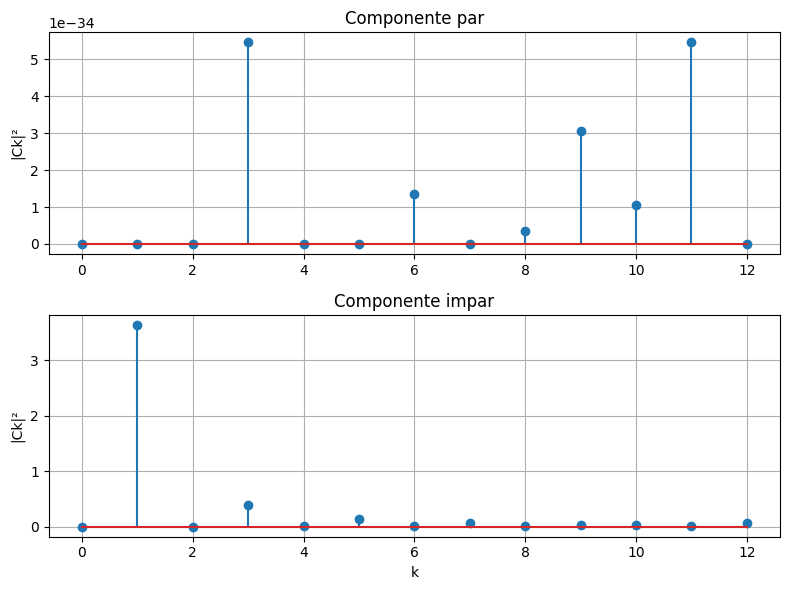

In [6]:
plt.figure(figsize=(8, 6))

# Componente par
plt.subplot(2, 1, 1)
plt.stem(np.abs(components[0])**2)
plt.ylabel('|Ck|²')
plt.title('Componente par')
plt.grid(True)

# Componente impar
plt.subplot(2, 1, 2)
plt.stem(np.abs(components[1])**2)
plt.ylabel('|Ck|²')
plt.xlabel('k')
plt.title('Componente impar')
plt.grid(True)

plt.tight_layout()
plt.show()



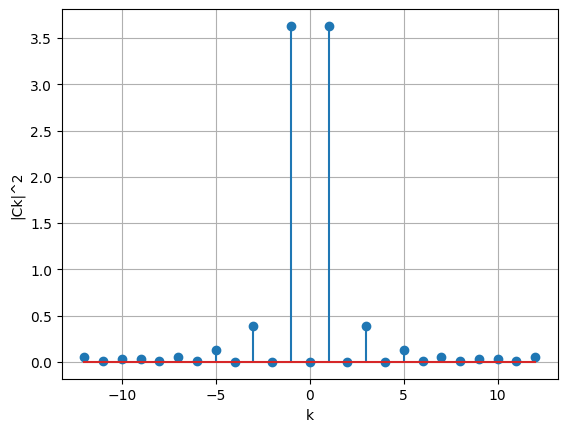

In [7]:
_ , Ck2 = getCk(x, n, 12)
Ck2 = np.absolute(Ck2)**2
Ck2 = np.concatenate((Ck2[::-1][:-1], [Ck2[0]], Ck2[1:]))

plt.stem(np.arange(-12, 13, 1), Ck2)
plt.xlabel('k')
plt.ylabel('|Ck|^2')
plt.grid()
plt.show()

In [8]:
P_n = np.sum(x**2)/N
_ , Ck2 = getCk(x, n, 12)
Ck2 = np.absolute(Ck2)**2
P_k = (2*np.sum(Ck2)) - Ck2[0]
print(f'P_n =', P_n)
print(f'P_k =', P_k)

P_n = 8.1
P_k = 8.73217414137293


Los valores de potencia son muy similares, a pesar de que no es el mismo, esto debido a que en la suma de las componentes de Ck no se toma las suficientes para llegar al valor obtenido tomando las componentes de la señal original, es una especie de falta de detalle. 

## Sı́ntesis de señales
Reconstruya la señal x(n) a partir de los coeficientes extraı́dos usando la ecuación de sı́ntesis

1. Grafique y concluya acerca de la señal obtenida.
Repita el procedimiento anterior para un $k = 5$ y $k = ( N2 − 1)$. ¿Qué se puede observar al reducir y al incrementar el número de coeficientes?

¿Fue posible recuperar la señal en su totalidad? Cuántos coeficientes considera necesarios para recuperar la señal en su totalidad. Explique.

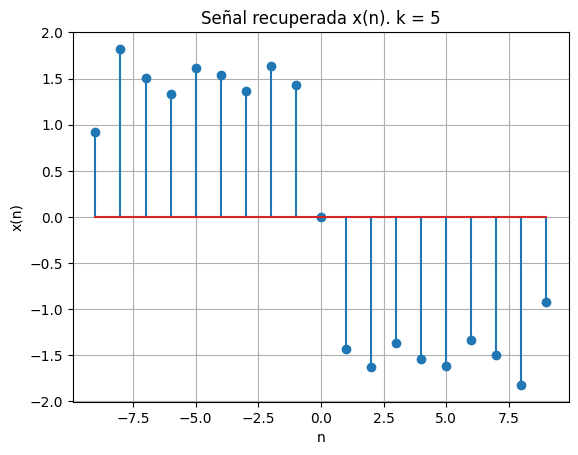

In [9]:
xn = []
k_val = 5
components, complexes = getCk(x, n, k_val)
for n_aux in n:
  aux = 0
  for k in range(k_val+1):
    aux += complexes[k] * np.exp(1j * 2 * np.pi * k * n_aux / len(x))
  xn.append(aux.real)

xn = np.array(xn)

plt.stem(n, xn)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('Señal recuperada x(n). k = 5')
plt.grid()
plt.show()

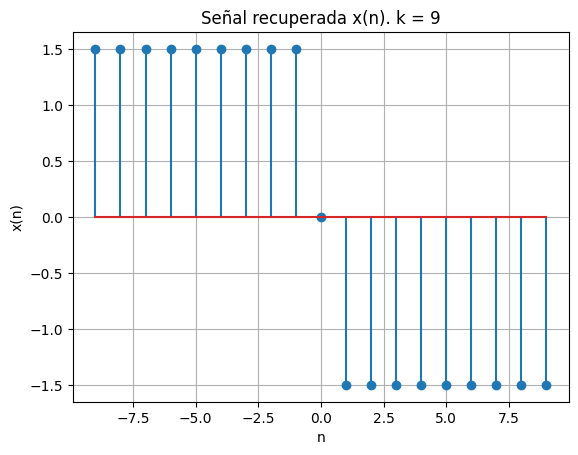

In [11]:
xn = []
k_val = 9
components, complexes = getCk(x, n, k_val)
for n_aux in n:
  aux = 0
  for k in range(k_val+1):
    aux += complexes[k] * np.exp(1j * 2 * np.pi * k * n_aux / len(x))
  xn.append(aux.real)

xn = np.array(xn)

%matplotlib inline
plt.stem(n, xn)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('Señal recuperada x(n). k = 9')
plt.grid()
plt.show()

A medida que se incluyen más coeficientes en la reconstrucción de la señal, se incorpora mayor cantidad de información espectral, lo que permite una reconstrucción más precisa y reduce errores como el fenómeno de Gibbs, especialmente en señales con discontinuidades. Se observa que la señal se reconstruye de manera satisfactoria con aproximadamente K=9 coeficientes, lo cual representa alrededor de la mitad del total de muestras. Esto se debe a que la Transformada Discreta de Fourier (DFT) de señales reales presenta simetría conjugada, lo que implica que parte de los coeficientes contienen información redundante. Además, gran parte de la energía de la señal suele estar concentrada en los coeficientes de baja frecuencia, lo que permite una reconstrucción precisa sin necesidad de utilizar todos los coeficientes. Por lo tanto, no siempre es necesario emplear todos los componentes espectrales para lograr una reconstrucción eficaz

## Conclusiones.

* La serie de Fourier es una herramienta fundamental para el análisis espectral de señales periódicas. No solo permite obtener información clave como la potencia de la señal, sino que también facilita el diseño y análisis de sistemas como filtros. Además, proporciona criterios para la manipulación eficiente de señales, por ejemplo, en la elección del ancho de banda adecuado para procesos de modulación y transmisión.

* La calidad de la reconstrucción de una señal a partir de sus coeficientes de Fourier depende directamente del número de coeficientes utilizados. Si se emplea un número insuficiente, se pueden presentar distorsiones, como el fenómeno de Gibbs, especialmente en señales con transiciones abruptas. Sin embargo, en muchos casos, no es necesario utilizar todos los coeficientes: conocer la estructura de la señal permite identificar cuántos componentes son realmente relevantes para una reconstrucción eficaz.

* En implementaciones prácticas, como sistemas embebidos o transmisión digital, el número de coeficientes también afecta directamente al costo computacional y de hardware. Señales que requieren muchos coeficientes para su correcta reconstrucción implican mayores recursos. Por ello, un buen conocimiento de la naturaleza de la señal permite optimizar el diseño del sistema, equilibrando fidelidad y eficiencia.
